# M-BERT



In [ ]:
PRETRAINED_MODEL = 'bert-base-multilingual-cased'
# Load the tokenizer.
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL)
# Load the model.
model = AutoModelForSequenceClassification.from_pretrained(PRETRAINED_MODEL, num_labels = dataset['label_count'])

# Tokenization

In [ ]:
#calculate max token count in training set
tr_token_counts = []
for row in train['Tweet']:
  token_count = len(tokenizer.encode(
    row,
    max_length=1000,
    truncation=True
  ))
  tr_token_counts.append(token_count)

sns.histplot(tr_token_counts)
plt.xlim([0, 200]);

In [ ]:
#calculate max token count in validation set
val_token_counts = []
for row in val['Tweet']:
  token_count = len(tokenizer.encode(
    row,
    max_length=1000,
    truncation=True
  ))
  val_token_counts.append(token_count)

sns.histplot(val_token_counts)
plt.xlim([0, 200]);

In [ ]:
#calculate max token count in test set
test_token_counts = []
for row in test['Tweet']:
  token_count = len(tokenizer.encode(
    row,
    max_length=1000,
    truncation=True
  ))
  test_token_counts.append(token_count)

sns.histplot(test_token_counts)
plt.xlim([0, 200]);

In [ ]:
#set parameters
TRAIN_MAX_TOKEN_LEN = 125
VAL_MAX_TOKEN_LEN = 125
TEST_MAX_TOKEN_LEN = 125

# Training and Validation

In [ ]:
train_loader = get_batches(train, tokenizer, TRAIN_MAX_TOKEN_LEN,per_gpu_train_batch_size)
val_loader = get_batches(val, tokenizer, VAL_MAX_TOKEN_LEN,per_gpu_eval_batch_size)
model = build_model(PRETRAINED_MODEL, dataset['label_count'])
optimizer = build_optimizer(model, opt , learning_rate, epsilon,weight_decay)
scheduler = build_scheduler(model, optimizer, epochs, len(train_loader))

train_loss_arr,val_loss,val_accuracy,training_stats,early_stopped_model = train_model(train_loader,val_loader,model,optimizer,scheduler,epochs, device,max_grad_norm)

100%|██████████| 2774/2774 [00:51<00:00, 54.27it/s]


In [ ]:
plotEarlyStopCheckpoint(train_loss_arr,val_loss,'/content/src/img/earlystop_mbert.png')
lossCurve(train_loss_arr,val_loss,'/content/src/img/lossplot_mbert.png')
accuracyCurve(train_loss_arr,val_accuracy,'/content/src/img/accplot_mbert.png')
timer(training_stats)

# Prediction on Test Set

Evaluation for: LR with Multilingual Encoding : Test
              precision    recall  f1-score   support

     AGAINST      0.628     0.692     0.659       903
       FAVOR      0.736     0.763     0.749      1329
     NEUTRAL      0.667     0.494     0.568       542

    accuracy                          0.687      2774
   macro avg      0.677     0.650     0.659      2774
weighted avg      0.688     0.687     0.684      2774



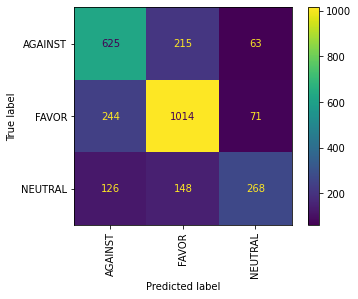

In [ ]:
test_loader = get_batches(test, tokenizer, TEST_MAX_TOKEN_LEN,per_gpu_eval_batch_size)

input_ids, predictions, true_labels, attentions = prediction(test_loader, model, device)
evaluation_summary("MBERT - Prediction", true_labels, predictions,  dataset['labels'])
ConfusionMatrixDisplay.from_predictions(true_labels, predictions,xticks_rotation='vertical')

In [ ]:
f1score(true_labels, predictions)

Micro Average Precision :  0.7051189617880317
Micro Average Recall :  0.7051189617880317
Micro Average F1-Score :  0.7051189617880317
............................
Macro Average Precision :  0.6951158383571525
Macro Average Recall :  0.6864330641686535
Macro Average F1-Score :  0.6897175200240867


In [ ]:
print("label: AGAINST")
roc(true_labels, predictions,0)
print("label: FAVOR")
roc(true_labels, predictions,1)
print("label: NEUTRAL")
roc(true_labels, predictions,2)